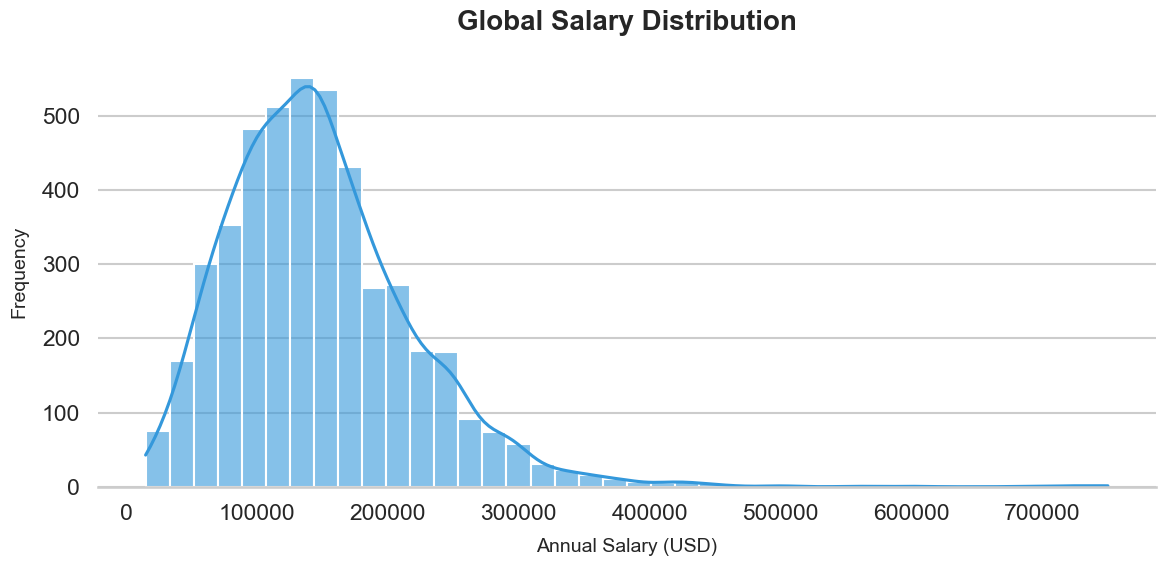

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_13148\1782728572.py:57: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_13148\1782728572.py:72: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_13148\1782728572.py:72: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


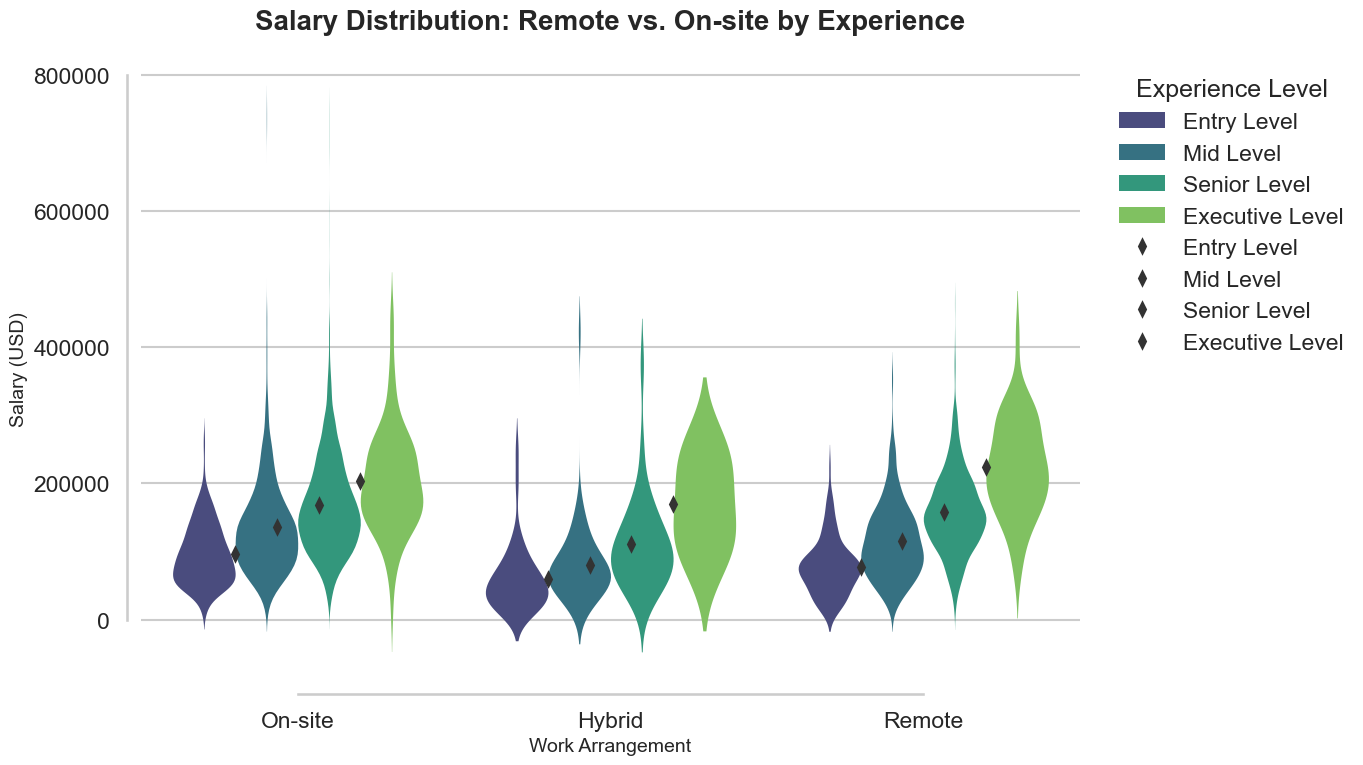

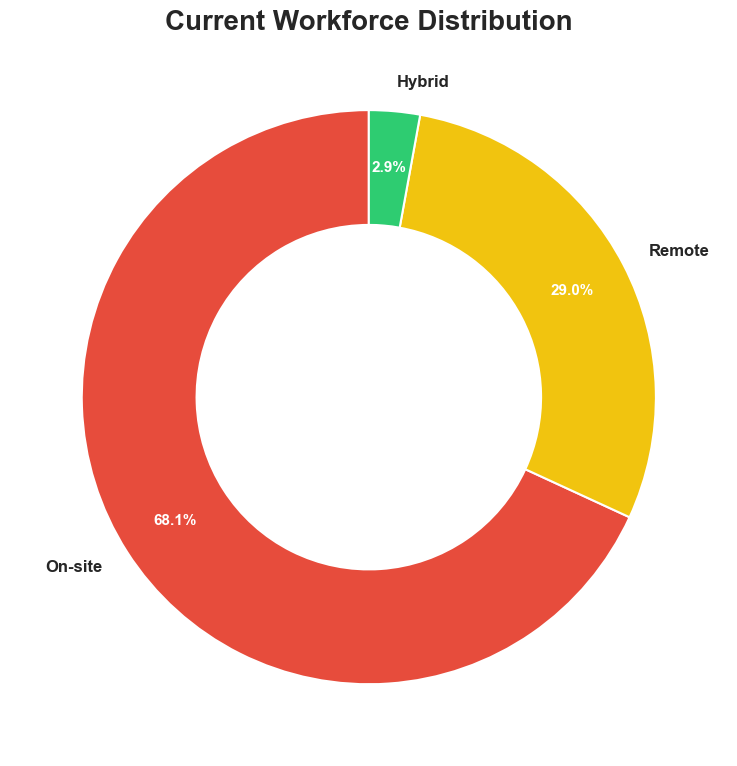

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_13148\1782728572.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=labels, y=costs, palette=["#95a5a6", "#2ecc71"], edgecolor=None)


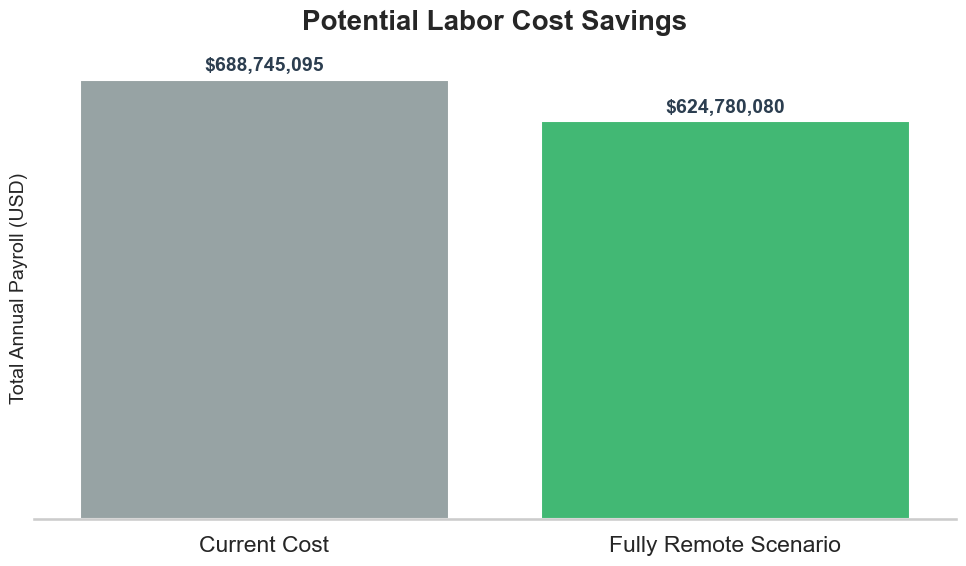

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_13148\1782728572.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


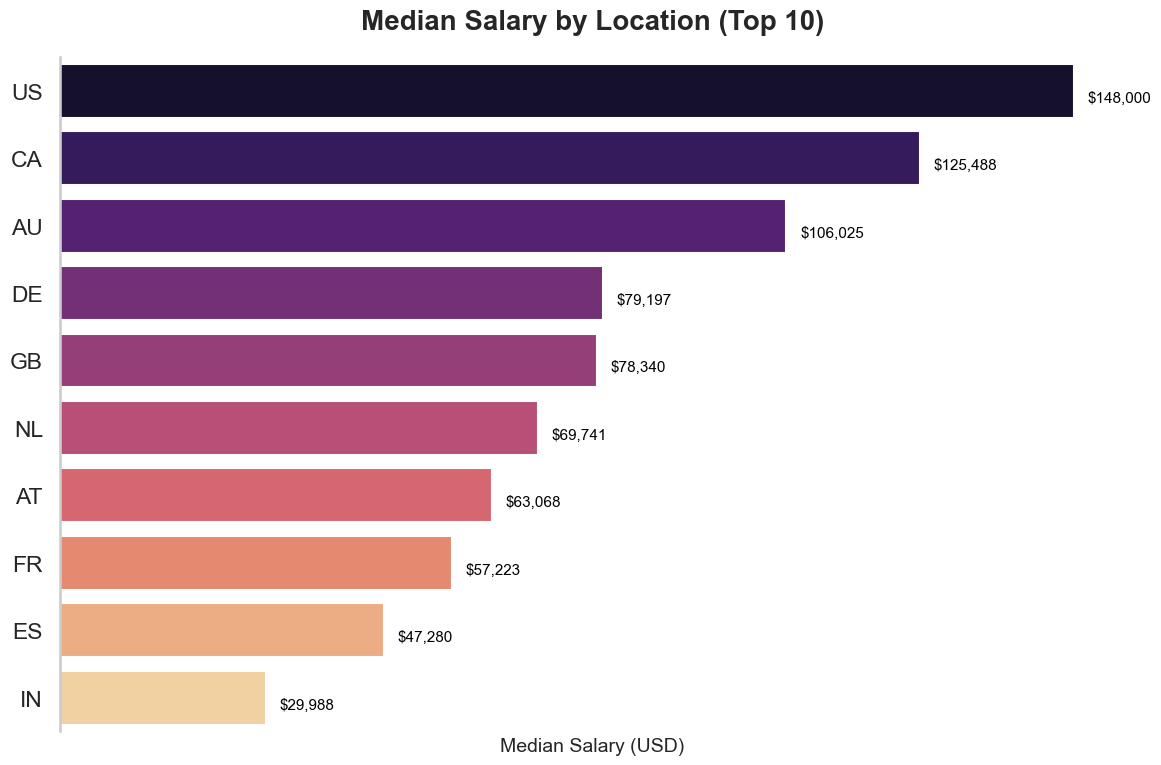

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==========================================
# 1. AESTHETIC SETUP
# ==========================================
# Load Data
df = pd.read_csv("FoAI_A2_data_4.6k.csv")

# Set a professional theme
# 'whitegrid' provides a clean background with horizontal lines for reference
# 'context="talk"' scales up fonts for better readability in reports/slides
sns.set_theme(style="whitegrid", context="talk", font_scale=1.0)

# Define Custom Palettes for consistency
# "Viridis" and "Mako" are colorblind-friendly and professional
categorical_palette = sns.color_palette("viridis", 4)
binary_palette = sns.color_palette("viridis", 2)
remote_palette = ["#e74c3c", "#f1c40f", "#2ecc71"] # Red (On-site), Yellow (Hybrid), Green (Remote)

# --- APPLY MAPPINGS ---
experience_map = {'EN': 'Entry Level', 'MI': 'Mid Level', 'SE': 'Senior Level', 'EX': 'Executive Level'}
remote_map = {0: 'On-site', 50: 'Hybrid', 100: 'Remote'}
df['Experience Level'] = df['experience_level'].map(experience_map)
df['Work Arrangement'] = df['remote_ratio'].map(remote_map)

# Define logical orders
exp_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
remote_order = ['On-site', 'Hybrid', 'Remote']

# ==========================================
# 2. VISUAL 1: SALARY DISTRIBUTION (Clean Histogram)
# ==========================================
plt.figure(figsize=(12, 6))

# Main plot
sns.histplot(df['salary_in_usd'], kde=True, bins=40, color="#3498db", alpha=0.6, edgecolor=None)

# Aesthetics
plt.title('Global Salary Distribution', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Annual Salary (USD)', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
sns.despine(left=True) # Remove left/top/right borders for a cleaner look
plt.grid(axis='x', alpha=0) # Remove vertical grid lines
plt.tight_layout()
plt.show()


# ==========================================
# 3. VISUAL 2 (RQ1): SALARY BY REMOTE & EXPERIENCE (Violin Plot)
#    Why: Violin plots are more "organic" and show density better than boxes.
# ==========================================
plt.figure(figsize=(14, 8))

sns.violinplot(
    x='Work Arrangement', 
    y='salary_in_usd', 
    hue='Experience Level',
    data=df, 
    order=remote_order, 
    hue_order=exp_order,
    palette=categorical_palette,
    inner=None,  # Remove inner bars to reduce clutter
    linewidth=0, # Remove outline for a softer look
    scale='width'
)

# Add swarmplot or strip plot dots inside for detail (Optional but engaging)
# We use a pointplot to show the median clearly on top
sns.pointplot(
    x='Work Arrangement', 
    y='salary_in_usd', 
    hue='Experience Level',
    data=df, 
    order=remote_order, 
    hue_order=exp_order,
    dodge=0.4, 
    join=False, 
    palette=['#333']*4, # Dark dots for median
    markers="d", 
    scale=0.7, 
    errorbar=None
)

plt.title('Salary Distribution: Remote vs. On-site by Experience', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Work Arrangement', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
sns.despine(offset=10, trim=True) # "Trim" makes axes not touch
plt.legend(title='Experience Level', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()


# ==========================================
# 4. VISUAL 3 (RQ1): ADOPTION (Modern Donut Chart)
#    Why: Donuts are cleaner than Pies.
# ==========================================
adoption_counts = df['Work Arrangement'].value_counts()
labels = adoption_counts.index
sizes = adoption_counts.values
colors = remote_palette # Use the Red/Yellow/Green defined earlier

plt.figure(figsize=(8, 8))

# Create Pie
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90, 
    pctdistance=0.80, 
    wedgeprops=dict(width=0.4, edgecolor='white') # Width < 1 makes it a donut
)

# Style the text
plt.setp(texts, size=12, weight="bold")
plt.setp(autotexts, size=11, color="white", weight="bold")

plt.title('Current Workforce Distribution', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


# ==========================================
# 5. VISUAL 4 (RQ1/RQ3): COST SCENARIO (Bar Chart with Labels)
# ==========================================
# Data Prep
current_cost = df['salary_in_usd'].sum()
remote_benchmarks = df[df['remote_ratio'] == 100].groupby('Experience Level')['salary_in_usd'].median()
df['projected_remote'] = df.apply(lambda row: remote_benchmarks.get(row['Experience Level'], row['salary_in_usd']), axis=1)
projected_cost = df['projected_remote'].sum()

costs = [current_cost, projected_cost]
labels = ['Current Cost', 'Fully Remote Scenario']

plt.figure(figsize=(10, 6))

# Bar Plot
bar_plot = sns.barplot(x=labels, y=costs, palette=["#95a5a6", "#2ecc71"], edgecolor=None)

# Add Annotations (The "Beautiful" touch)
for i, p in enumerate(bar_plot.patches):
    height = p.get_height()
    bar_plot.text(
        p.get_x() + p.get_width()/2., 
        height + (height * 0.02), 
        f'${height:,.0f}', 
        ha="center", fontsize=14, fontweight='bold', color='#2c3e50'
    )

plt.title('Potential Labor Cost Savings', fontsize=20, fontweight='bold', pad=20)
plt.ylabel('Total Annual Payroll (USD)', fontsize=14)
plt.yticks([]) # Remove Y-axis numbers since we have labels on bars
sns.despine(left=True) # Remove left spine completely
plt.tight_layout()
plt.show()


# ==========================================
# 6. VISUAL 5 (RQ2): GEOGRAPHIC ARBITRAGE (Horizontal Bar)
#    Why: Horizontal bars are easier to read for country names.
# ==========================================
top_countries = df['company_location'].value_counts().head(10).index
country_data = df[df['company_location'].isin(top_countries)].groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))

# Horizontal Bar Plot
ax = sns.barplot(
    x='salary_in_usd', 
    y='company_location', 
    data=country_data, 
    palette='magma'
)

# Annotations
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 2000,       # x-position
        p.get_y() + p.get_height()/2 + 0.1, # y-position
        f'${width:,.0f}',   # Label text
        ha="left", va="center", fontsize=11, color='black'
    )

plt.title('Median Salary by Location (Top 10)', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Median Salary (USD)', fontsize=14)
plt.ylabel('')
sns.despine(bottom=True)
plt.xticks([]) # Hide X-axis numbers
plt.tight_layout()
plt.show()